# Objective 1: Understand the Time-Series Structure Per Simulation

This section explores the temporal structure of the simulation data by plotting the six strain components (E1–E6) and six stress components (S1–S6) over time. Additionally, input-output relationships such as S1 vs. E1 are visualized to assess non-linearity and path dependence in the response.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set styles for plots
sns.set(style="whitegrid", context="notebook")

## Load Sample Time-Series Files

We load a selection of RVE simulation cases to understand the general structure and behaviour of the strain and stress time-series.

In [10]:
# Define the base path
base_path = "/Users/andhikanasution/Library/CloudStorage/OneDrive-UniversityofBristol/2. Data Science MSc/Modules/Data Science Project/composite_stress_prediction/data/_CSV"

# Define full paths to selected CSV files
file_paths = {
    "001": os.path.join(base_path, "IM78552_DATABASE_001.csv"),
    "010": os.path.join(base_path, "IM78552_DATABASE_010.csv"),
    "500": os.path.join(base_path, "IM78552_DATABASE_500.csv")
}

# Load data into dictionary
time_series_data = {k: pd.read_csv(path) for k, path in file_paths.items()}

# Preview the first few rows 
time_series_data["001"].head()

,Unnamed: 0,time,E1,S1,E2,S2,E3,S3,E4,S4,...,S5solid,E5coh,S5coh,E6solid,S6solid,E6coh,S6coh,TotalVolumecoh,TotalVolume,TotalVolumetraction
0,0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,129.960004,129.960004
1,1,0.000509,-0.000028,-2.454815,5.721173e-17,-0.144005,1.180291e-08,-0.092352,1.272864e-18,-1.564023e-12,...,2.871584e-13,2.212047e-18,4.424062e-16,2.898576e-15,9.229924e-12,-1.550654e-15,-3.100918e-13,0.908901,129.957191,130.866092
2,2,0.001001,-0.000173,-15.314128,6.999593e-17,-0.891029,3.935280e-07,-0.560179,6.062252e-17,-3.858944e-10,...,-6.294792e-10,-3.632448e-14,5.077716e-12,-5.753263e-13,-9.164690e-09,2.869016e-13,5.738024e-11,0.904539,129.942622,130.847160
3,3,0.001506,-0.000351,-30.960213,7.058067e-17,-1.802887,1.167435e-06,-1.136184,-3.982186e-16,3.757085e-09,...,6.207148e-10,-7.973091e-14,2.021654e-13,-1.918131e-12,4.085783e-08,9.447372e-13,1.889472e-10,0.899296,129.924837,130.824133
4,4,0.002012,-0.000528,-46.635924,6.614225e-17,-2.717091,2.089634e-06,-1.714539,3.169784e-16,8.040838e-09,...,-3.087026e-09,-8.683184e-14,-2.801000e-12,-1.635977e-12,6.062086e-09,7.855566e-13,1.571115e-10,0.894057,129.907014,130.801071


## Time-Series Plots of Strain Components (E1–E6)

The strain components are visualized over time to examine loading characteristics for different simulation cases.

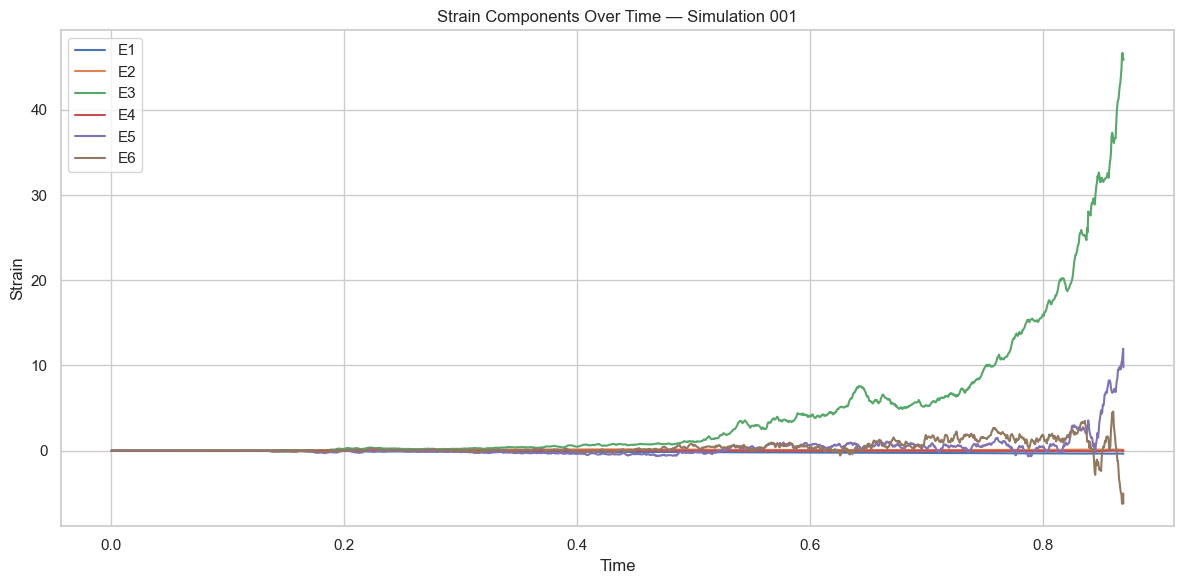

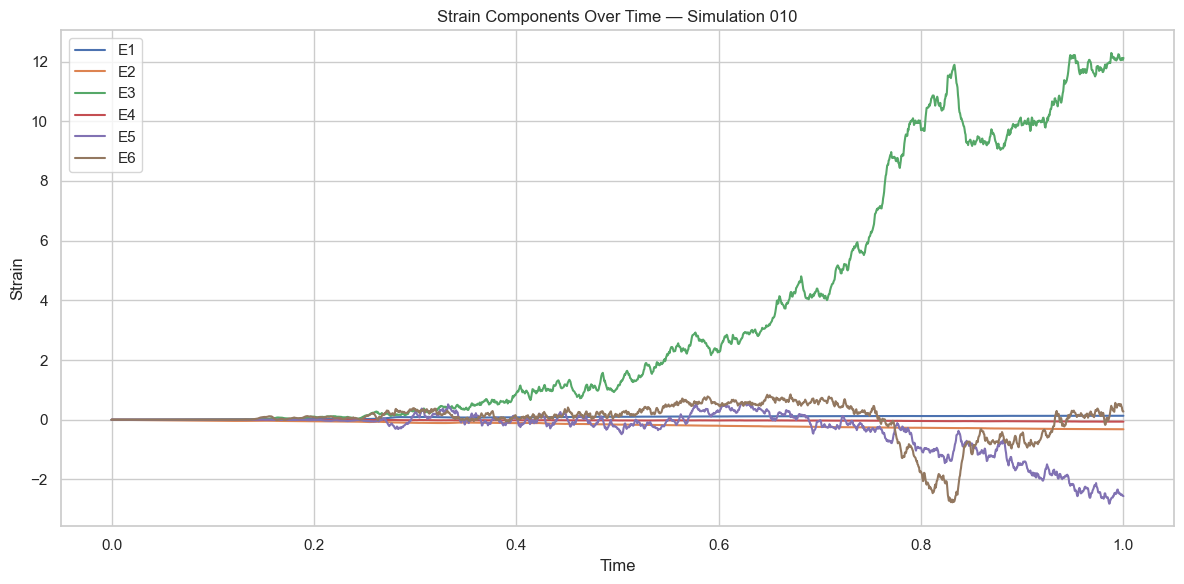

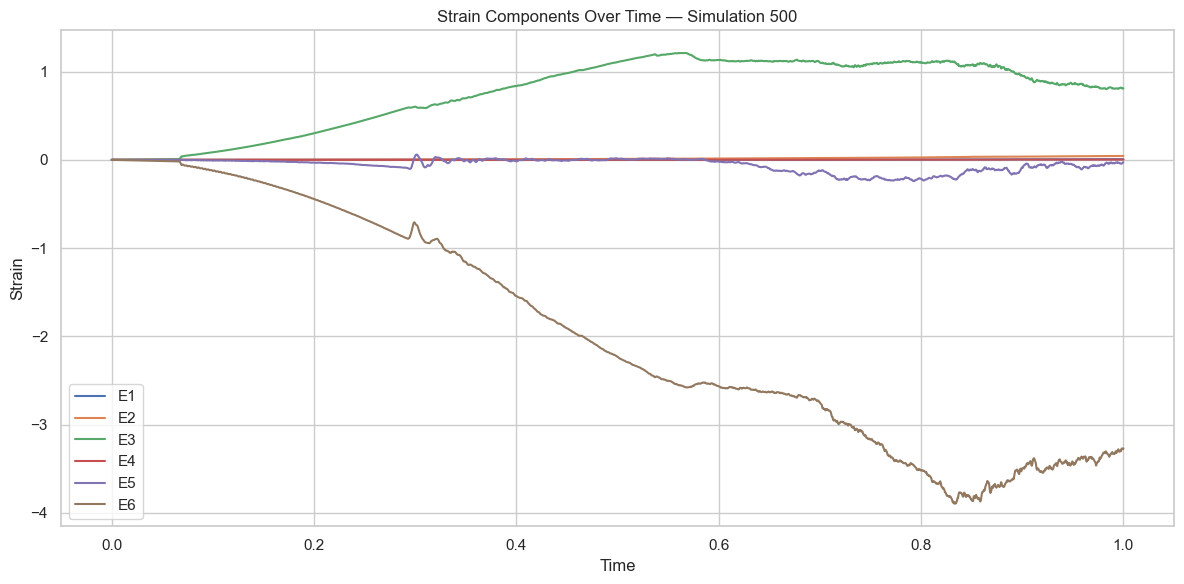

In [13]:
strain_cols = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6']

for key, df in time_series_data.items():
    plt.figure(figsize=(12, 6))
    for col in strain_cols:
        plt.plot(df['time'], df[col], label=col)
    plt.title(f"Strain Components Over Time — Simulation {key}")
    plt.xlabel("Time")
    plt.ylabel("Strain")
    plt.legend()
    plt.tight_layout()
    plt.show()

## Time-Series Plots of Stress Components (S1–S6)

We now plot the stress response over time to identify non-linearity, hysteresis, or softening trends.

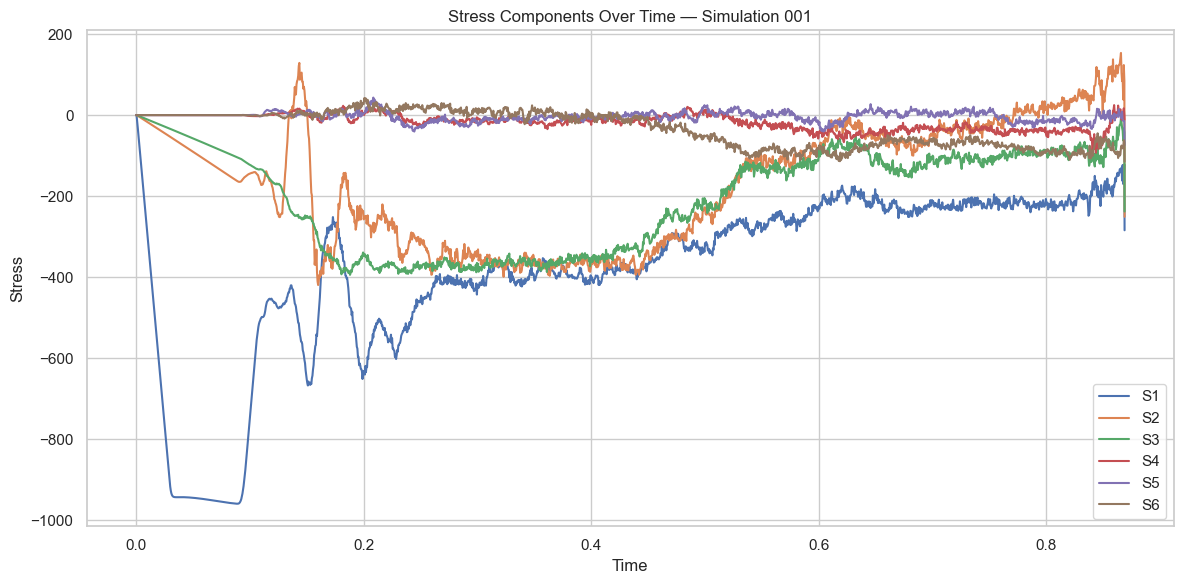

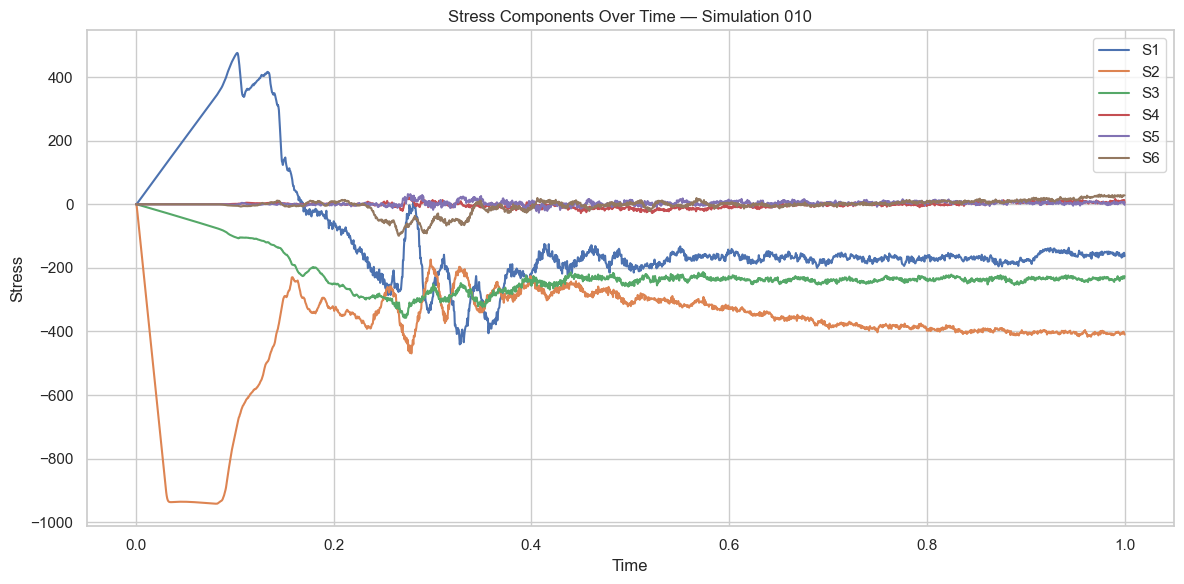

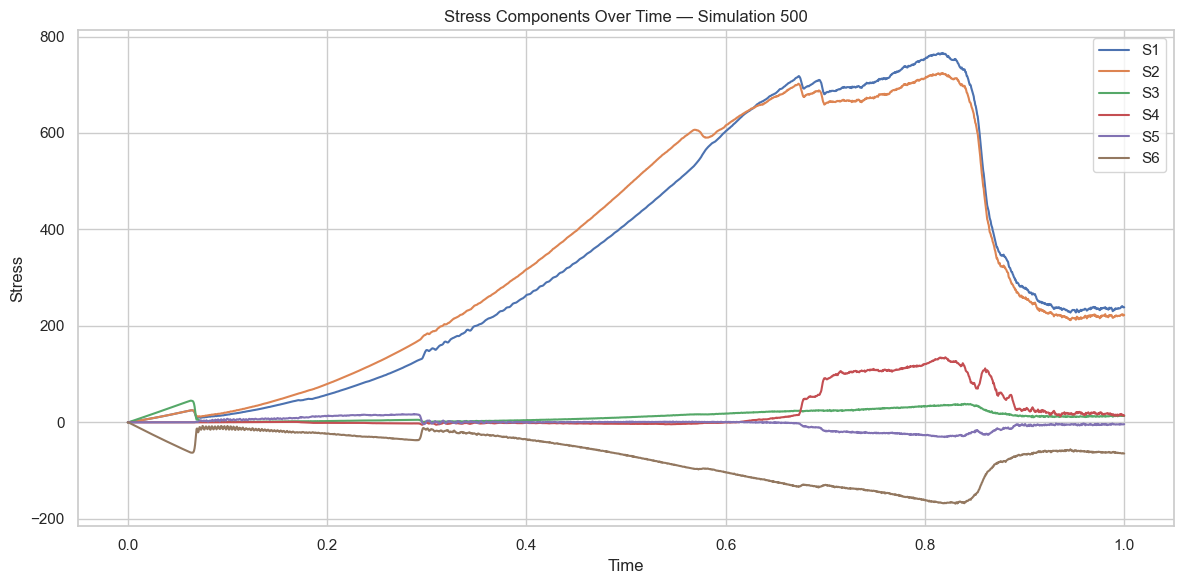

In [16]:
stress_cols = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6']

for key, df in time_series_data.items():
    plt.figure(figsize=(12, 6))
    for col in stress_cols:
        plt.plot(df['time'], df[col], label=col)
    plt.title(f"Stress Components Over Time — Simulation {key}")
    plt.xlabel("Time")
    plt.ylabel("Stress")
    plt.legend()
    plt.tight_layout()
    plt.show()

## Overlay Plots: Stress vs. Strain

These plots illustrate the relationship between individual strain and stress components (e.g., S1 vs. E1), which may indicate material non-linearity, damage, or memory effects.


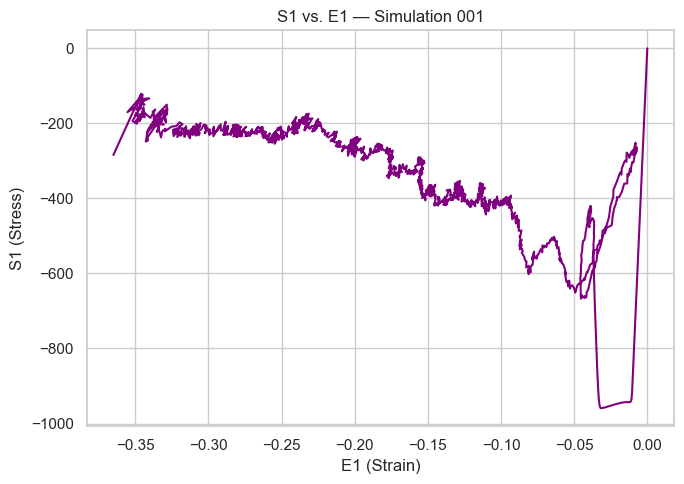

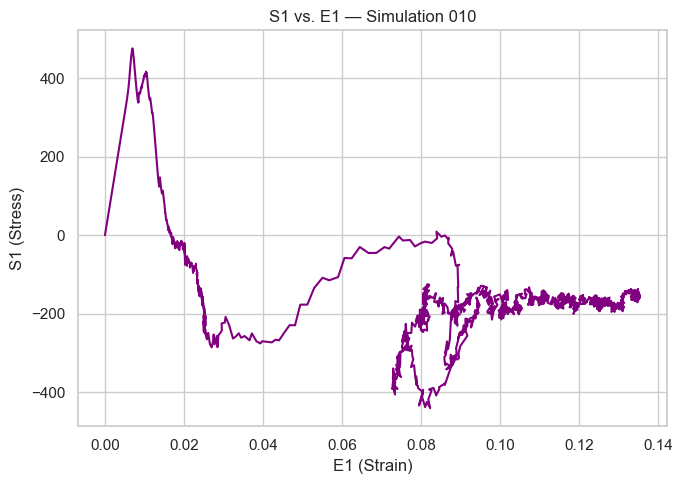

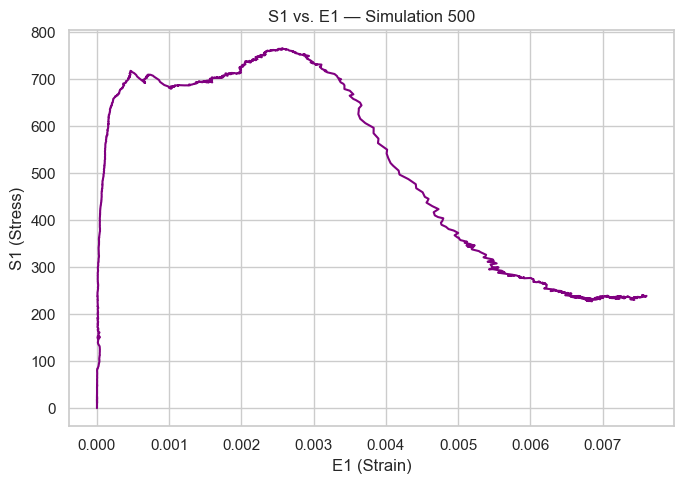

In [24]:
for key, df in time_series_data.items():
    plt.figure(figsize=(7, 5))
    plt.plot(df['E1'], df['S1'], color='purple')
    plt.title(f"S1 vs. E1 — Simulation {key}")
    plt.xlabel("E1 (Strain)")
    plt.ylabel("S1 (Stress)")
    plt.tight_layout()
    plt.show()


# Objective 2: Check Dataset Consistency and Coverage

This section evaluates the consistency of the dataset by:
- Checking the length of each time-series file
- Scanning for missing (NaN) values, constant columns, or extreme values
- Ensuring alignment between the filenames and the metadata/output files

In [27]:
import numpy as np
import glob
from tqdm import tqdm

# Path to time-series folder
csv_folder = "/Users/andhikanasution/Library/CloudStorage/OneDrive-UniversityofBristol/2. Data Science MSc/Modules/Data Science Project/composite_stress_prediction/data/_CSV"

# List all CSV files in folder (should be 1848)
csv_files = sorted(glob.glob(os.path.join(csv_folder, "*.csv")))

# Check count
print(f"Total files found: {len(csv_files)}")

Total files found: 1848


In [29]:
# Initialise data collection
lengths = []
nan_counts = []
constant_columns = []
extreme_values = []

strain_cols = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6']
stress_cols = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6']
columns_of_interest = strain_cols + stress_cols

# Loop through each CSV
for file in tqdm(csv_files, desc="Scanning time-series files"):
    df = pd.read_csv(file)
    
    # Store time-series length
    lengths.append(len(df))
    
    # Count NaNs
    nan_counts.append(df[columns_of_interest].isna().sum().sum())
    
    # Check for constant columns
    const_cols = [col for col in columns_of_interest if df[col].nunique() <= 1]
    if const_cols:
        constant_columns.append((os.path.basename(file), const_cols))
    
    # Check for extreme values
    extremes = df[columns_of_interest].apply(lambda x: (x.abs() > 1e5).sum())
    if extremes.sum() > 0:
        extreme_values.append((os.path.basename(file), extremes[extremes > 0].to_dict()))

Scanning time-series files: 100%|██████████| 1848/1848 [00:09<00:00, 196.75it/s]


## Dataset Length Distribution

We now examine the distribution of time-series lengths across all simulations to check for consistency.

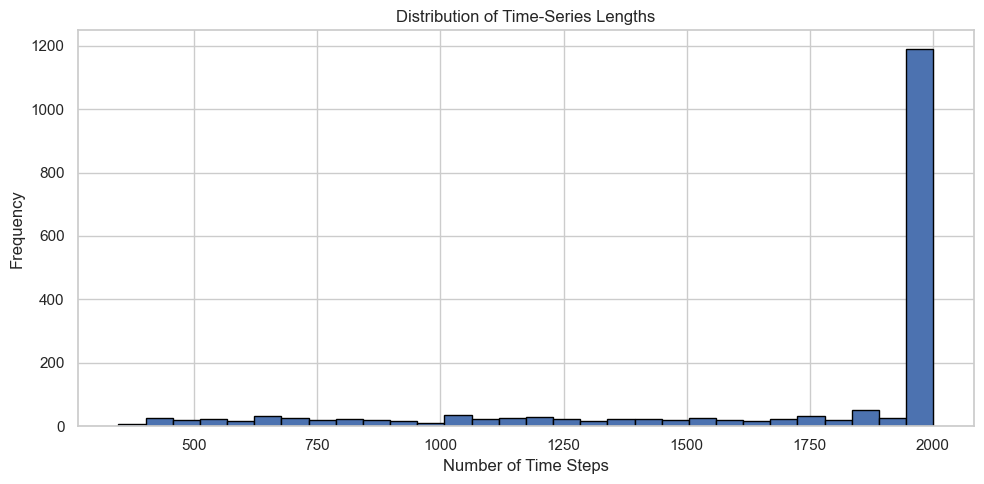

Mean Length: 1713.52
Min Length: 346
Max Length: 2001


In [32]:
plt.figure(figsize=(10, 5))
plt.hist(lengths, bins=30, edgecolor='black')
plt.title("Distribution of Time-Series Lengths")
plt.xlabel("Number of Time Steps")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

print(f"Mean Length: {np.mean(lengths):.2f}")
print(f"Min Length: {np.min(lengths)}")
print(f"Max Length: {np.max(lengths)}")

## Summary Statistics for E1–E6 and S1–S6

Using the first 100 time-series files, we compute the overall summary statistics for the main columns of interest.

In [35]:
summary_sample = []

for file in csv_files[:100]:
    df = pd.read_csv(file)
    summary_sample.append(df[columns_of_interest].describe().loc[['min', 'max', 'mean', 'std']])

# Aggregate
agg_stats = pd.concat(summary_sample).groupby(level=0).mean()
agg_stats.T.round(3)

,max,mean,min,std
E1,0.116,0.013,-0.098,0.061
E2,0.077,0.028,-0.024,0.029
E3,20.951,2.251,-0.005,3.206
E4,0.020,-0.016,-0.051,0.017
E5,11.539,-0.039,-5.532,1.931
E6,5.808,0.008,-6.686,1.276
S1,586.029,-109.678,-864.508,238.528
S2,271.731,-75.917,-567.918,127.151
S3,24.707,-129.353,-412.714,69.374
S4,61.420,-5.689,-40.515,12.293


## Detected Anomalies

Below we list:
- Time-series files with NaN values
- Time-series with constant strain/stress columns
- Time-series containing extreme outlier values

In [38]:
# Files with NaNs
nan_issues = [csv_files[i] for i, count in enumerate(nan_counts) if count > 0]
print(f"Files with NaNs: {len(nan_issues)}")
print(nan_issues[:5])

# Files with constant columns
print(f"\nFiles with constant strain/stress columns: {len(constant_columns)}")
print(constant_columns[:5])

# Files with extreme values
print(f"\nFiles with extreme values: {len(extreme_values)}")
print(extreme_values[:5])

Files with NaNs: 0
[]

Files with constant strain/stress columns: 0
[]

Files with extreme values: 0
[]


# Objective 3: Examine Input Metadata Distribution

In this section, we explore the static input features provided in the `IM78552_DATABASEInput.csv` file. According to supervisor clarification:
- Columns 1–6 represent **load amplitudes**
- Column 7 is the **load angle**
- Columns 8–11 are the **lamination parameters**
- Columns 12–13 (load pair indices) are currently not used for modelling

We will:
- Visualise the distribution of load angles
- Examine the distribution and correlation of lamination parameters
- Investigate potential dimensionality reductions or dominant parameters

In [41]:
# Path to metadata input file
input_path = "/Users/andhikanasution/Library/CloudStorage/OneDrive-UniversityofBristol/2. Data Science MSc/Modules/Data Science Project/composite_stress_prediction/data/IM78552_DATABASEInput.csv"

# Load into DataFrame
meta_df = pd.read_csv(input_path, header=None)

# Assign column names
meta_df.columns = [
    'load_amp_1', 'load_amp_2', 'load_amp_3',
    'load_amp_4', 'load_amp_5', 'load_amp_6',
    'load_angle',
    'lam_param_1', 'lam_param_2', 'lam_param_3', 'lam_param_4',
    'load_pair_1', 'load_pair_2'
]

# Preview
meta_df.head()

,load_amp_1,load_amp_2,load_amp_3,load_amp_4,load_amp_5,load_amp_6,load_angle,lam_param_1,lam_param_2,lam_param_3,lam_param_4,load_pair_1,load_pair_2
0,2.0000,0.00000,0.0,0.0,0.0,0.0,-3.1416,0.5,0.5,0,0,1,2
1,1.9616,0.39018,0.0,0.0,0.0,0.0,-2.9452,0.5,0.5,0,0,1,2
2,1.8478,0.76537,0.0,0.0,0.0,0.0,-2.7489,0.5,0.5,0,0,1,2
3,1.6629,1.11110,0.0,0.0,0.0,0.0,-2.5525,0.5,0.5,0,0,1,2
4,1.4142,1.41420,0.0,0.0,0.0,0.0,-2.3562,0.5,0.5,0,0,1,2


## Load Angle Distribution

Below is the distribution of the `load_angle` feature (column 7). This represents the orientation of loading and may affect anisotropic stress responses.

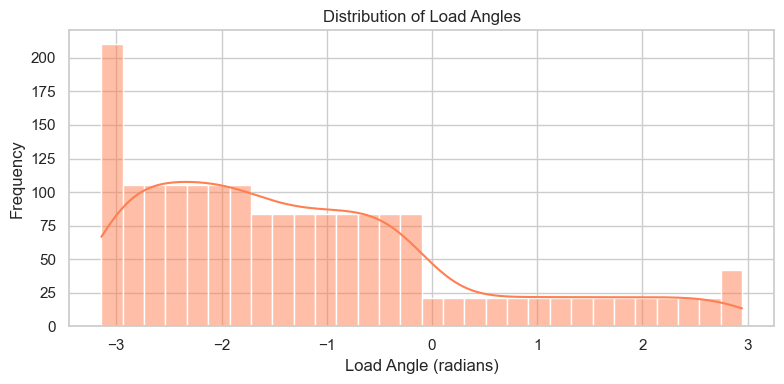

In [46]:
plt.figure(figsize=(8, 4))
sns.histplot(meta_df['load_angle'], bins=30, kde=True, color='coral')
plt.title("Distribution of Load Angles")
plt.xlabel("Load Angle (radians)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

## Lamination Parameters Analysis

We now examine the distribution and relationships among the four lamination parameters (columns 8–11), which define key composite design variables affecting stiffness and anisotropy.

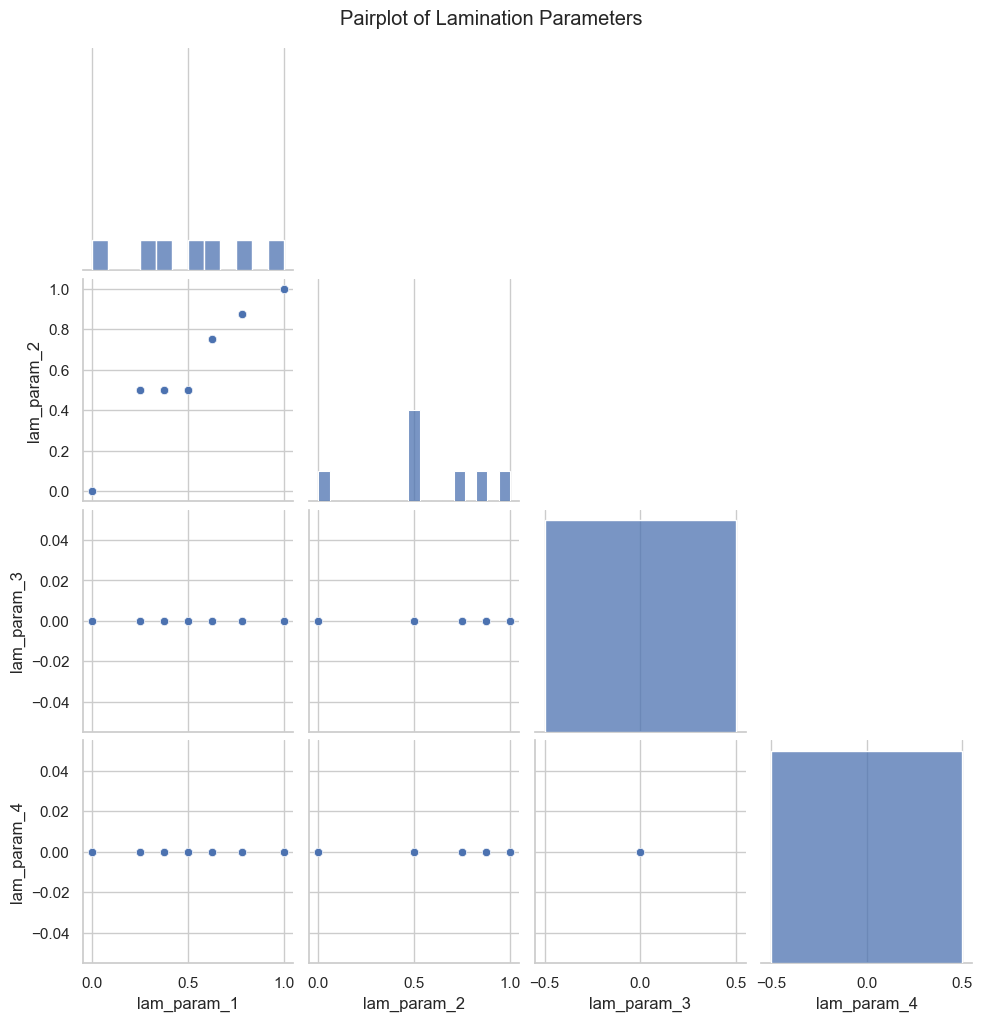

In [54]:
lam_cols = ['lam_param_1', 'lam_param_2', 'lam_param_3', 'lam_param_4']

# Pairplot
sns.pairplot(meta_df[lam_cols], corner=True)
plt.suptitle("Pairplot of Lamination Parameters", y=1.02)
plt.show()


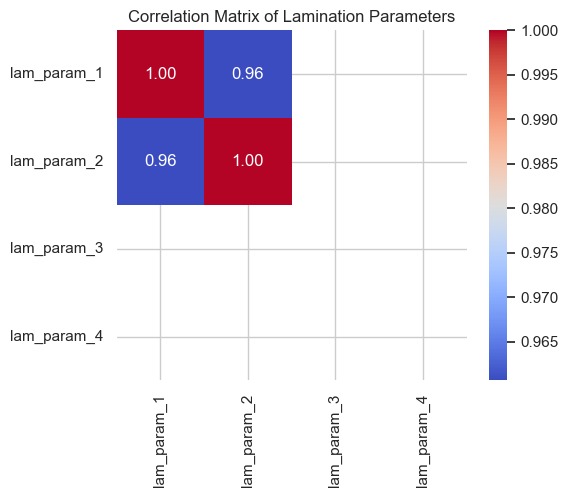

In [56]:
# Correlation matrix
corr = meta_df[lam_cols].corr()

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Lamination Parameters")
plt.tight_layout()
plt.show()

# Objective 4: Assess Target Stress Properties (Optional)

In this section, we explore the `IM78552_DATABASEOutput.csv` file containing global properties per simulation. These include:
- Effective stress
- Fracture energy
- Stress/strain at key points
- Lamination parameters

We will:
- Visualise distributions of fracture energy and effective stress
- Compare these global values with last-step stress from time-series files (optional)
- Examine relationships between input features (e.g., lamination parameters) and output metrics


In [60]:
# Path to output summary file
output_path = "/Users/andhikanasution/Library/CloudStorage/OneDrive-UniversityofBristol/2. Data Science MSc/Modules/Data Science Project/composite_stress_prediction/data/IM78552_DATABASEOutput.csv"

# Load into DataFrame
output_df = pd.read_csv(output_path)

# Preview
output_df.head()

,# effective stress,0,Fracture Energy: 1,2,loading angle,loading pair: 1,2.1,lamination parameter: 1,2.2,3,...,3.1,4.1,5,6,stress: 1,2.4,3.2,4.2,5.1,6.1
0,972.717801,0.0,14.839681,0.000000,-3.1416,0.0,1.0,0.5,0.5,0.0,...,0.006876,-2.956200e-08,0.000004,4.120750e-07,-959.107957,-162.147605,-103.746080,0.007401,-0.004365,0.001646
1,1089.974370,0.0,16.817080,0.822065,-2.9452,0.0,1.0,0.5,0.5,0.0,...,0.005445,1.040535e-06,-0.000002,1.005353e-06,-959.036268,-517.970621,-90.402774,-0.020437,0.061865,-0.015704
2,1365.999494,0.0,17.594771,3.612745,-2.7489,0.0,1.0,0.5,0.5,0.0,...,0.008140,7.257299e-06,-0.000015,4.461186e-05,-954.144468,-977.529004,-114.737246,0.230988,0.168250,0.162326
3,1389.777789,0.0,34.139822,17.722951,-2.5525,0.0,1.0,0.5,0.5,0.0,...,0.008473,-2.660624e-06,-0.000008,1.458260e-05,-980.109992,-985.325686,-124.923200,0.055590,0.052552,-0.405817
4,1391.729830,0.0,22.413891,11.768763,-2.3562,0.0,1.0,0.5,0.5,0.0,...,0.009546,-1.331967e-06,-0.000061,-1.209048e-05,-978.659149,-989.514118,-139.028906,-0.009260,1.282627,-0.235433


## Distribution of Fracture Energy and Effective Stress

We first explore some of the most critical material response properties across simulations:
- `# effective stress`: Overall material stress response
- `Fracture Energy: 1`: Integrated stress–strain energy (area under curve)

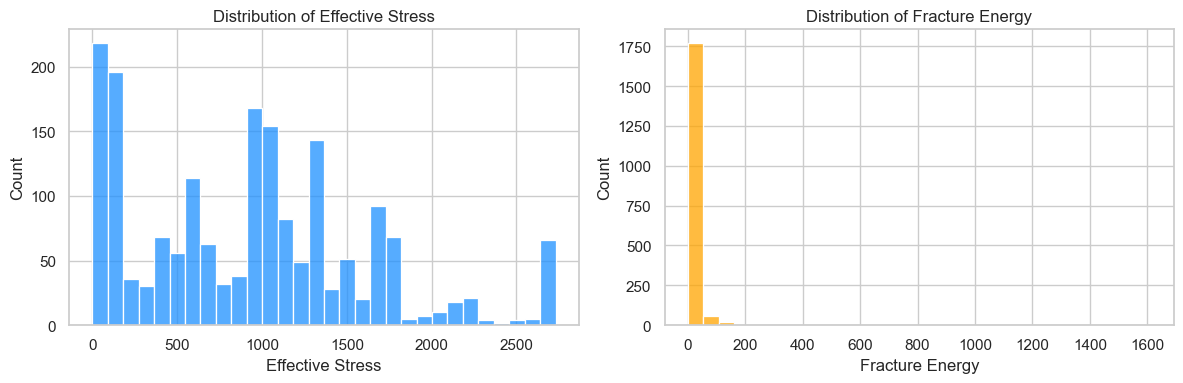

In [65]:
# Rename columns for easier access if needed
output_df = output_df.rename(columns=lambda x: x.strip())

# Plot histograms
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(output_df["# effective stress"], bins=30, ax=axs[0], color='dodgerblue')
axs[0].set_title("Distribution of Effective Stress")
axs[0].set_xlabel("Effective Stress")
axs[0].grid(True)

if "Fracture Energy: 1" in output_df.columns:
    sns.histplot(output_df["Fracture Energy: 1"], bins=30, ax=axs[1], color='orange')
    axs[1].set_title("Distribution of Fracture Energy")
    axs[1].set_xlabel("Fracture Energy")
    axs[1].grid(True)

plt.tight_layout()
plt.show()

## (Optional) Compare Output Stress to Final Time Step

We now extract the last time-step stress values from a few `.csv` files and compare them to the effective stress in the output summary file.


In [68]:
# Example: Compare final S1 from 3 files to output summary
sample_indices = [0, 9, 499]  # 001, 010, 500

for idx in sample_indices:
    file_id = f"{idx+1:03}"
    path = f"/Users/andhikanasution/Library/CloudStorage/OneDrive-UniversityofBristol/2. Data Science MSc/Modules/Data Science Project/composite_stress_prediction/data/_CSV/IM78552_DATABASE_{file_id}.csv"
    df = pd.read_csv(path)
    final_s1 = df["S1"].iloc[-1]
    eff_stress = output_df.loc[idx, "# effective stress"]
    print(f"Sample {file_id}: Final S1 = {final_s1:.2f}, Effective Stress = {eff_stress:.2f}")

Sample 001: Final S1 = -284.28, Effective Stress = 972.72
Sample 010: Final S1 = -162.72, Effective Stress = 1000.94
Sample 500: Final S1 = 238.44, Effective Stress = 77.23


## Lamination Parameter vs. Peak Stress

We now explore the relationship between input lamination parameters and peak stress, which could inform how different structural designs affect overall material strength.

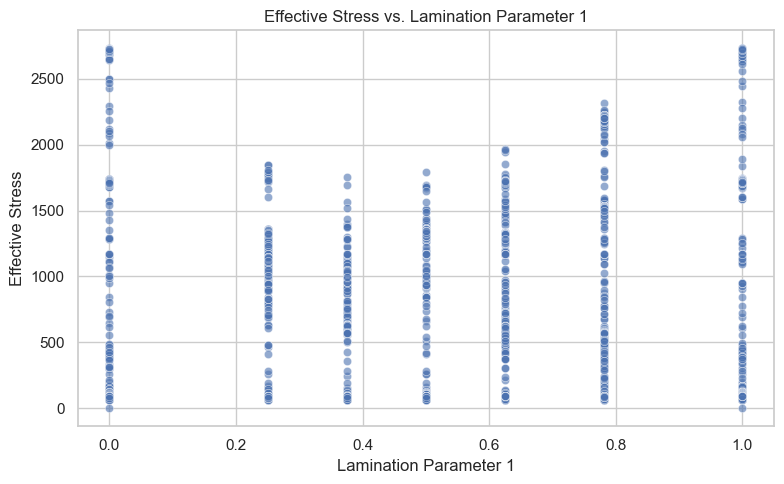

In [71]:
# Merge input metadata and output summary for joint analysis
joint_df = pd.concat([meta_df, output_df], axis=1)

# Scatterplot: lamination param vs effective stress
plt.figure(figsize=(8, 5))
sns.scatterplot(x=joint_df['lam_param_1'], y=joint_df["# effective stress"], alpha=0.6)
plt.title("Effective Stress vs. Lamination Parameter 1")
plt.xlabel("Lamination Parameter 1")
plt.ylabel("Effective Stress")
plt.grid(True)
plt.tight_layout()
plt.show()

## Objective 5: Explore Strain-to-Stress Relationship

**Goal:**  
Visualise how stress evolves with strain for each component (e.g., S1 vs. E1) across different samples.

**Actions:**  
- Load a few sample files (e.g., 001, 010, 500).
- Plot each pair: S1 vs. E1, S2 vs. E2, ..., S6 vs. E6.
- Analyse curve shapes to observe:
  - Non-linearity (curved rather than straight)
  - Hysteresis (looping behavior)
  - Softening or saturation
  - Sharp transitions or noise

These plots help you qualitatively assess the physical realism and diversity of mechanical responses in the dataset.

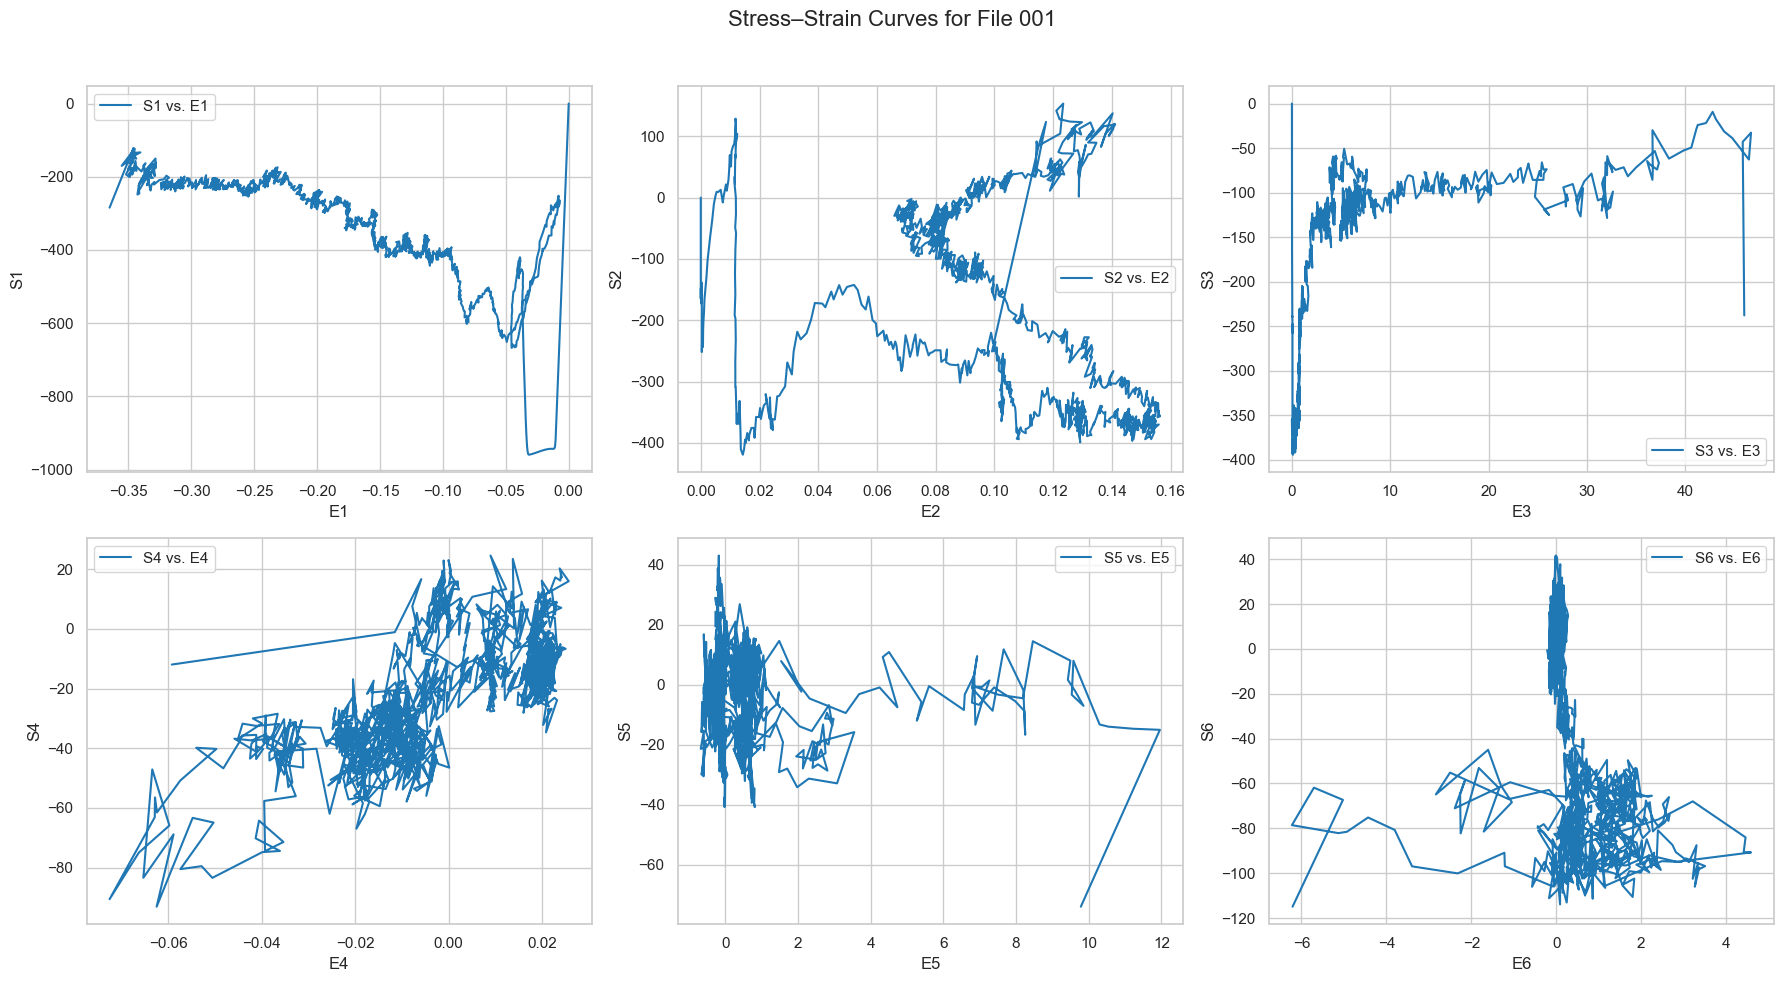

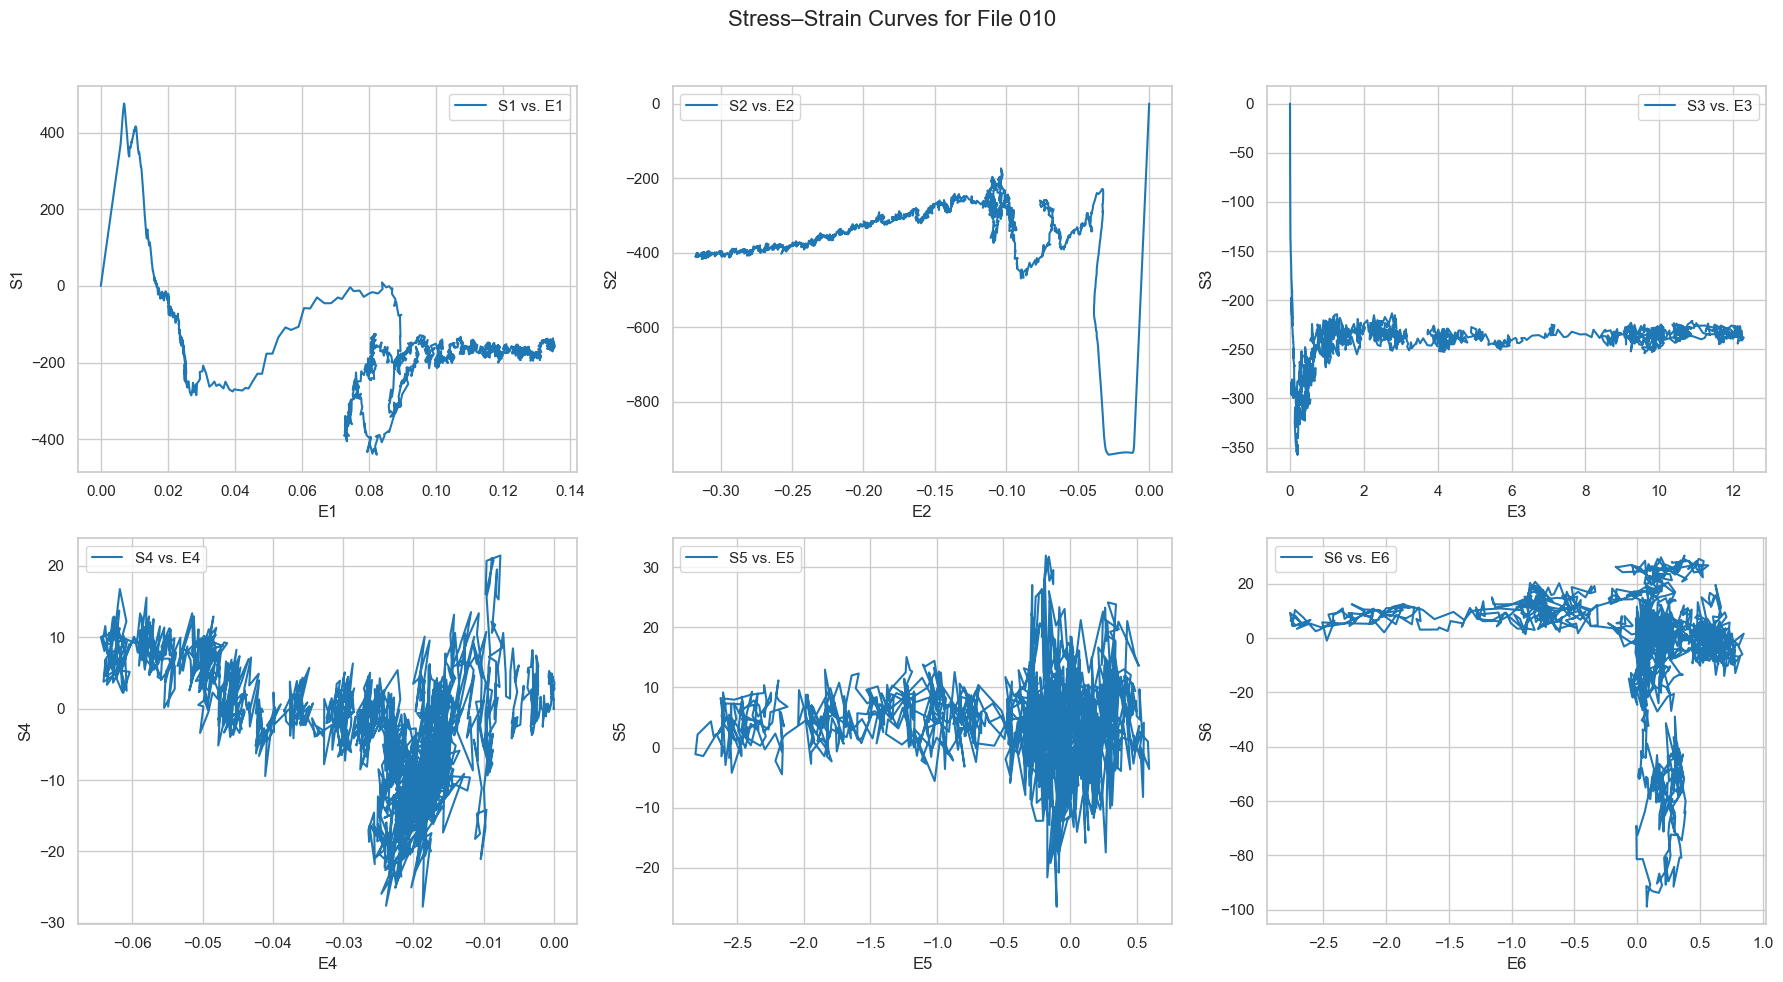

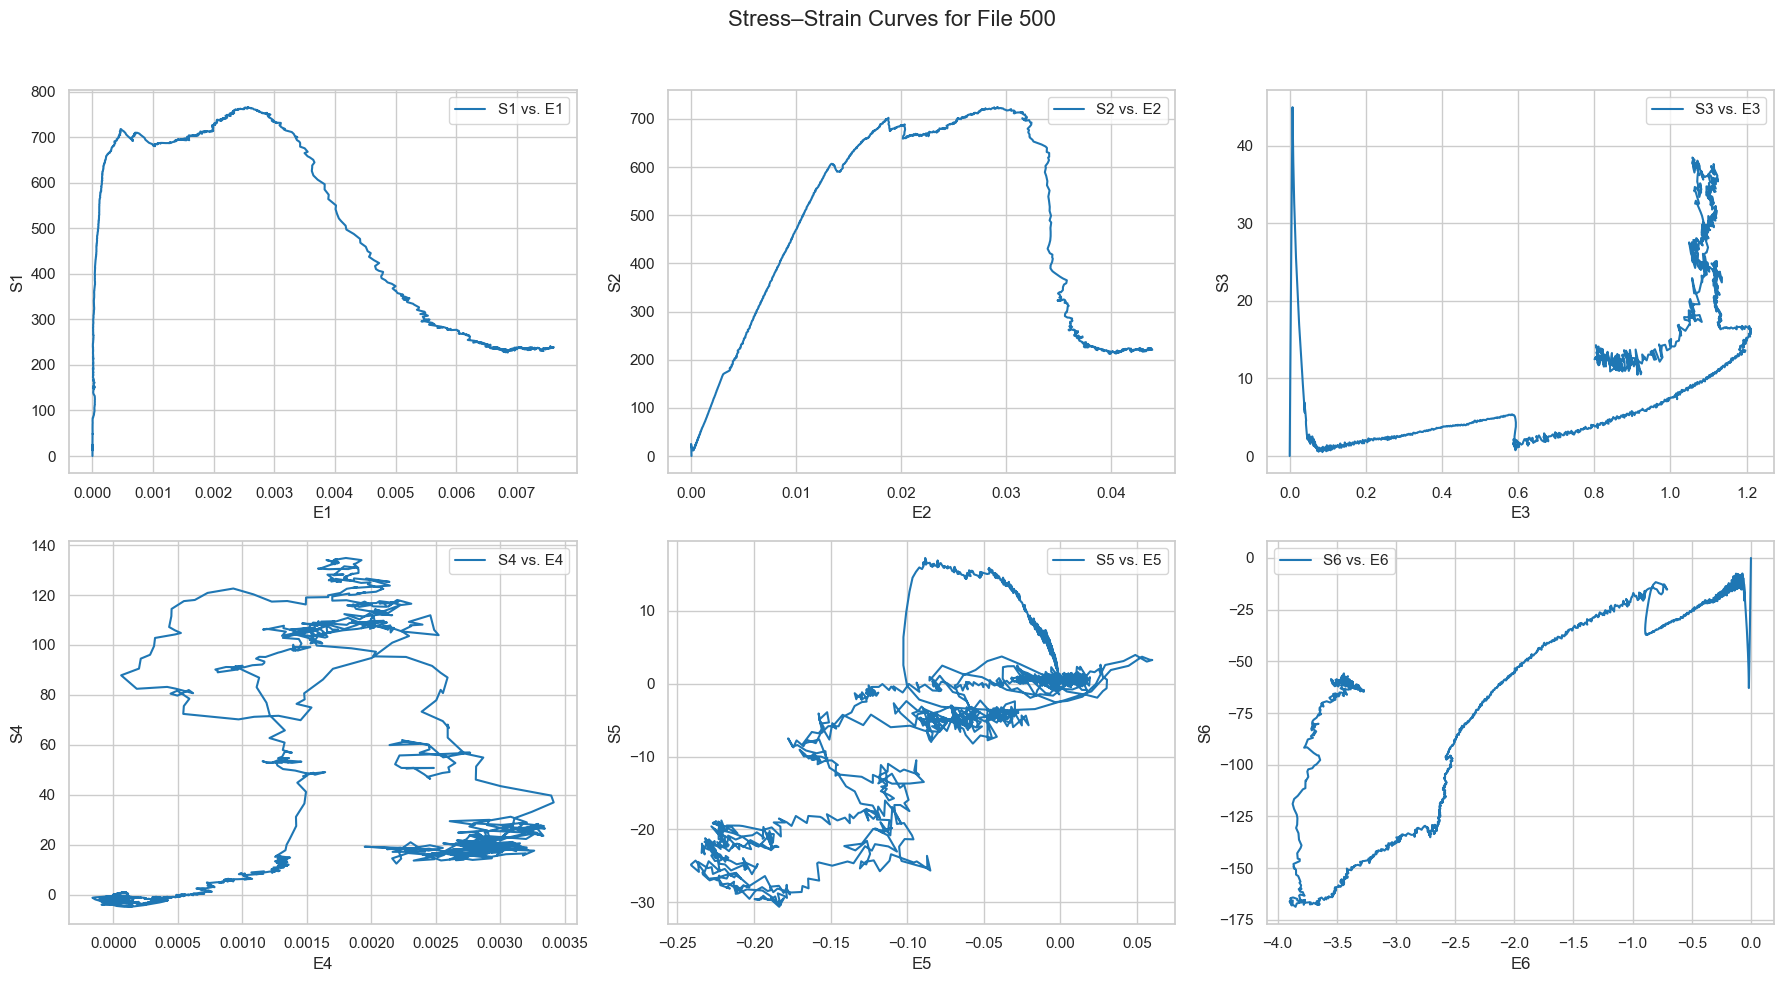

In [74]:
import matplotlib.pyplot as plt

def plot_stress_vs_strain(data, file_id):
    """
    Plots S1–S6 vs. E1–E6 for a given time-series DataFrame.
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle(f"Stress–Strain Curves for File {file_id}", fontsize=16)
    
    for i in range(6):
        strain_col = f"E{i+1}"
        stress_col = f"S{i+1}"
        ax = axes[i//3, i%3]
        ax.plot(data[strain_col], data[stress_col], label=f"{stress_col} vs. {strain_col}", color='tab:blue')
        ax.set_xlabel(strain_col)
        ax.set_ylabel(stress_col)
        ax.grid(True)
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Plot examples
for file_id in ["001", "010", "500"]:
    df = time_series_data[file_id]
    plot_stress_vs_strain(df, file_id)

## Objective 6: Determine Suitable Normalisation / Preprocessing

**Goal:**  
Evaluate whether strain and stress features (E1–E6, S1–S6) require normalisation before being used for model training.

**Actions:**  
- Aggregate data across a subset or all files.
- Compute per-feature statistics: mean, standard deviation, min, and max.
- Identify whether different features are on different scales or have skewed distributions.

**Expected Outputs:**  
- Summary table of feature-wise statistics.
- Recommendation for preprocessing method:
  - Z-score (standardisation) if Gaussian-like
  - Min–max scaling if bounded or skewed

In [85]:
from tqdm import tqdm
import pandas as pd

# Set the path to your CSV files
data_dir = "/Users/andhikanasution/Library/CloudStorage/OneDrive-UniversityofBristol/2. Data Science MSc/Modules/Data Science Project/composite_stress_prediction/data/_CSV"

# Define strain and stress columns
strain_cols = [f"E{i+1}" for i in range(6)]
stress_cols = [f"S{i+1}" for i in range(6)]

# Containers to collect all data
strain_data = []
stress_data = []

# Loop through all 1848 files
for i in tqdm(range(1, 1849)):
    file_path = f"{data_dir}/IM78552_DATABASE_{i:03d}.csv"
    df = pd.read_csv(file_path)
    strain_data.append(df[strain_cols])
    stress_data.append(df[stress_cols])

# Combine into one DataFrame
strain_all = pd.concat(strain_data, axis=0, ignore_index=True)
stress_all = pd.concat(stress_data, axis=0, ignore_index=True)
full_df = pd.concat([strain_all, stress_all], axis=1)

# Compute statistics
feature_stats = full_df.describe().T[["mean", "std", "min", "max"]].round(4)
feature_stats

100%|██████████████████████████████████████| 1848/1848 [00:07<00:00, 241.51it/s]


,mean,std,min,max
E1,0.0006,0.1088,-12.1132,0.4867
E2,0.0144,0.0813,-10.4785,0.5010
E3,1.6496,5.7058,-0.2210,1020.1506
E4,-0.0294,0.0692,-4.6057,3.1148
E5,-0.0915,9.0474,-1380.0728,1417.1904
E6,-0.1376,7.1140,-1136.5718,2134.0280
S1,-54.1102,332.2873,-35268.0324,17373.9205
S2,-44.6833,316.9346,-50612.2761,2978.7041
S3,-123.5419,174.1929,-20858.1787,21274.8269
S4,-29.1512,98.5295,-26486.0073,8516.8956


## Objective 6: Normalisation / Preprocessing Summary

### Summary Statistics

| Feature | Mean     | Std Dev  | Min        | Max        |
|---------|----------|----------|------------|------------|
| E1      | 0.0006   | 0.1088   | -12.1132   | 0.4867     |
| E2      | 0.0144   | 0.0813   | -10.4785   | 0.5010     |
| E3      | 1.6496   | 5.7058   | -0.2210    | 1020.1506  |
| E4      | -0.0294  | 0.0692   | -4.6057    | 3.1148     |
| E5      | -0.0915  | 9.0474   | -1380.0728 | 1417.1904  |
| E6      | -0.1376  | 7.1140   | -1136.5718 | 2134.0280  |
| S1      | -54.1102 | 332.2873 | -35268.0324| 17373.9205 |
| S2      | -44.6833 | 316.9346 | -50612.2761| 2978.7041  |
| S3      | -123.5419| 174.1929 | -20858.1787| 21274.8269 |
| S4      | -29.1512 | 98.5295  | -26486.0073| 8516.8956  |
| S5      | -3.0988  | 29.0576  | -5427.7240 | 23375.3790 |
| S6      | -7.8934  | 31.3945  | -9133.0634 | 13242.1060 |

### Insights

- **Strain Features (E1–E6):**
  - E1–E2 and E4 have relatively small ranges and low variance, suggesting stable strain amplitudes.
  - E3, E5, and E6 show significantly wider ranges and higher variance, particularly E5 and E6 (over ±1000), which may represent shear or out-of-plane components.
  - These discrepancies suggest **feature scaling is essential** to avoid biasing the model.

- **Stress Features (S1–S6):**
  - All stress components exhibit very high dynamic range and variability.
  - Min/max values range from ~-50,000 to +20,000, with large negative means for S1–S4.
  - These distributions are **highly skewed and unbounded**, so **Z-score standardisation** is recommended.

### Recommendation

- Use **Z-score standardisation** (subtract mean, divide by std) for all features (E1–E6, S1–S6).
- Consider checking for extreme outliers (e.g., via boxplots) before model training.
- Save calculated means and stds for inverse transformation and model interpretability.

